In [25]:
import  pandas as pd
pd.set_option('display.max_rows', None)

Pre-Processing the Data

In [26]:
# # read the file using pandas (Data_1991_2000.csv) as named df1
df1 = pd.read_csv(r"Data_1991_2000.csv")

Needs to convert the Date format as Year/month/day.

In [27]:
# # # change the date format 

df1["DATE"] = pd.to_datetime(df1['DATE']).dt.strftime('%Y-%m-%d')

Read all the rest of the files and concat as a single DataFrame

In [28]:
# # read the 2nd file using pandas (Data_2001_2010.csv) as named df2
df2 = pd.read_csv(r"Data_2001_2010.csv")

In [29]:
# # read the 3rd file using pandas (Data_2011_2020.csv) as named df3
df3 = pd.read_csv(r"Data_2011_2020.csv")


In [30]:
# # read the 4th file using pandas (Data_2021_2023.csv) as named df4
df4 = pd.read_csv(r"Data_2021_2023.csv")


All the csv files formatted perfectly to concat as single DataFrame 

In [31]:
# concat as single DataFrame 

combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)


Create new columns with Year and Month

In [32]:
# Create new columns with Month
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])
combined_df["MONTH"] = combined_df["DATE"].dt.month


In [33]:
# Create new columns with Year
combined_df["YEAR"] = combined_df["DATE"].dt.year


Export as single csv file of all Data (from 1991 to 2023). As the file name - allData_1991_2023.csv

In [34]:
# export as single csv file of all Data from 1991 to 2023 
# combined_df.to_csv("allData_1991_2024.csv", index=False)

Aggregate rainfall by year

In [35]:
# Aggregate rainfall by year
df = pd.read_csv(r"allData_1991_2024.csv")

In [36]:
df['DATE'] = pd.to_datetime(df['DATE']) # converts the DATE column as datetime format 
df = df.dropna(subset=['DATE', 'PRCP']) # drop null values 
df = df.drop_duplicates('DATE') # drop duplicates 

df.to_csv("duplicatesEleminated_1991_2024.csv", index=False) # Export as csv file of eliminated duplicates and null values  

In [37]:
yearly_rainfall = df.groupby('YEAR')['PRCP'].sum().reset_index() # Total railfall by year
print(yearly_rainfall)

    YEAR   PRCP
0   1991  46.34
1   1992  41.44
2   1993  65.79
3   1994  57.95
4   1995  57.51
5   1996  73.39
6   1997  61.99
7   1998  43.17
8   1999  40.55
9   2000  41.06
10  2001  53.40
11  2002  46.20
12  2003  33.26
13  2004  51.03
14  2005  83.01
15  2006  53.85
16  2007  48.23
17  2008  63.21
18  2009  51.76
19  2010  53.38
20  2011  60.56
21  2012  38.67
22  2013  38.42
23  2014  45.90
24  2015  95.61
25  2016  47.60
26  2017  57.98
27  2018  35.45
28  2019  50.75
29  2020  58.62
30  2021  80.60
31  2022  54.80
32  2023  80.47
33  2024  39.24


In [38]:
# Average rainfall by month

avgPRCP_byMonth = df.groupby("MONTH")["PRCP"].mean()
print(avgPRCP_byMonth)

MONTH
1     0.073362
2     0.036752
3     0.051671
4     0.067025
5     0.120119
6     0.181989
7     0.200797
8     0.255989
9     0.244933
10    0.509871
11    0.681943
12    0.418626
Name: PRCP, dtype: float64


In [39]:
import matplotlib.pyplot as plt

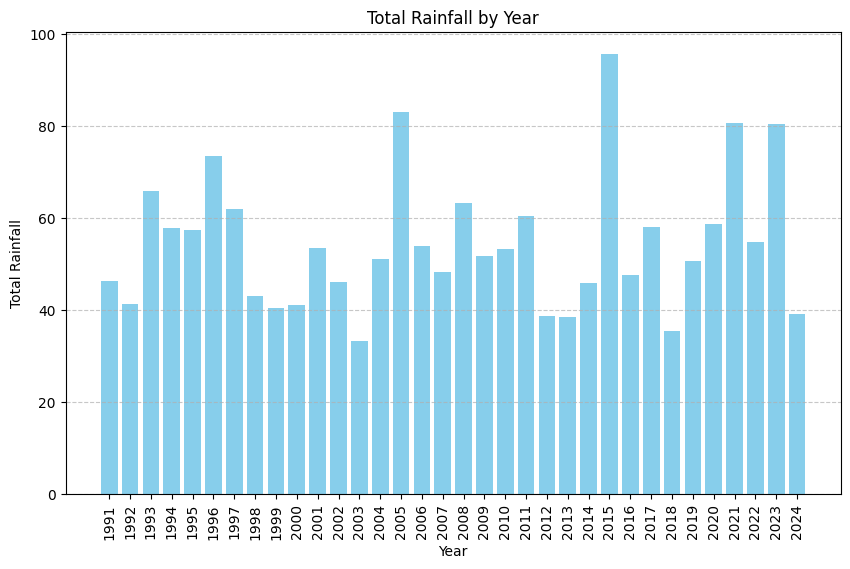

In [40]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_rainfall['YEAR'].astype(str), yearly_rainfall['PRCP'], color='skyblue')

# Chart labels and title
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Year')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

 Stacked Bar Plot for view by month along with Yearly total

In [41]:
# Stacked Bar Plot

monthly_rainfall = df.groupby(['YEAR', 'MONTH'])['PRCP'].sum().reset_index()

monthly_rainfall.to_csv("monthly_Rainfall.csv", index=False)


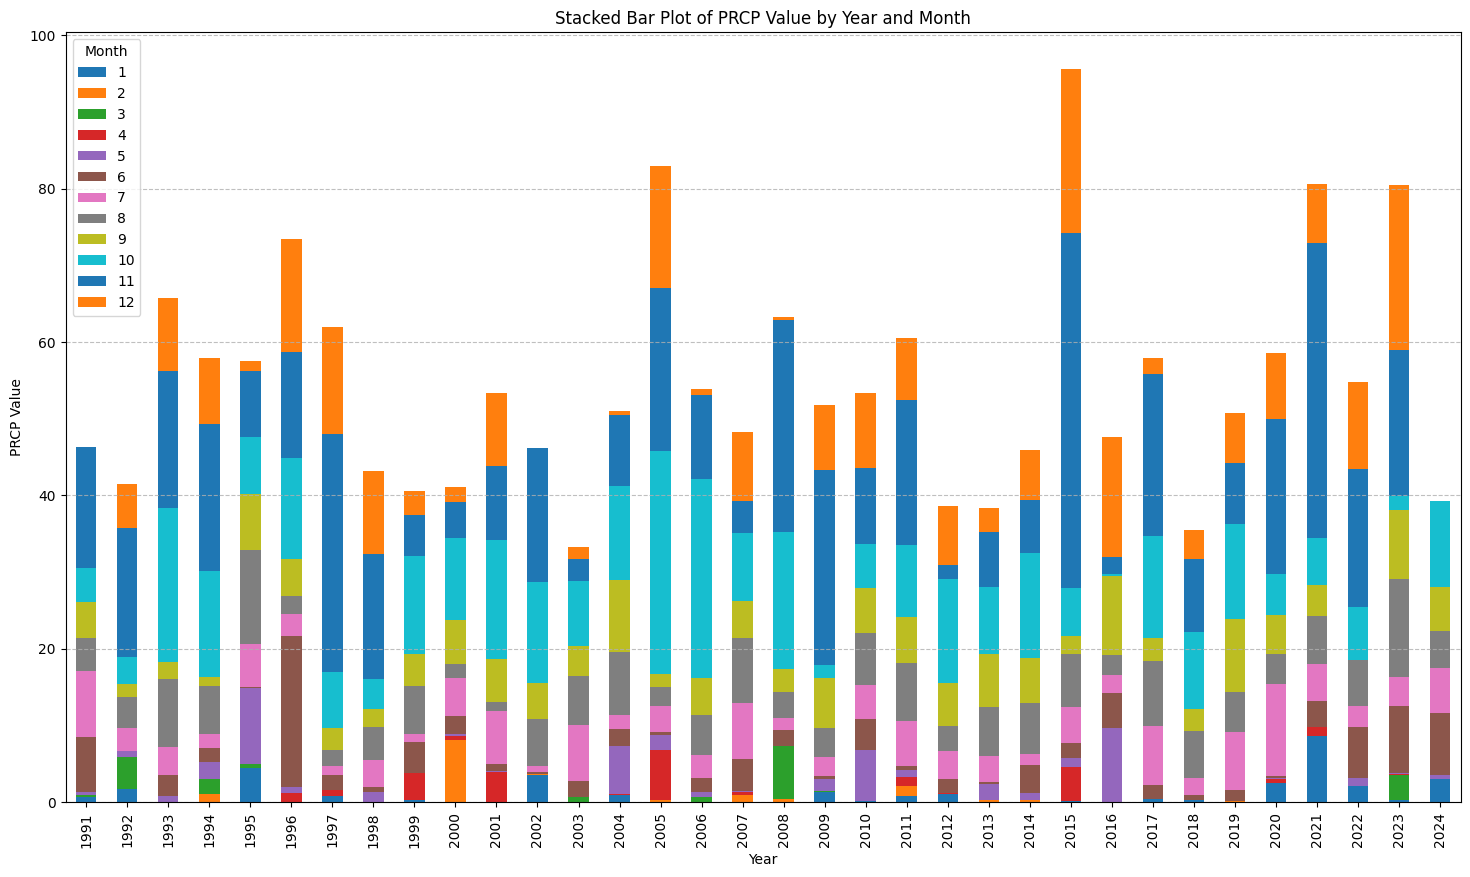

In [42]:
# Use pivot_table
df_pivot = df.pivot_table(index='YEAR', columns='MONTH', values='PRCP', aggfunc='sum') # Aggregation Function setting as 'sum'. which is the same Year and Month combinations will be summed. 

# Plotting the stacked bar plot
df_pivot.plot(kind='bar', stacked=True , figsize=(18,10)) # Increase plot size by specifying figsize

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PRCP Value')
plt.title('Stacked Bar Plot of PRCP Value by Year and Month')
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()